### Setup data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing(as_frame=True)
df = df.frame
df.info()
df.columns
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### EDA

In [ ]:
!pip install ydata_profiling

from ydata_profiling import ProfileReport

profile= ProfileReport(df, title="profile_test_ydata")
profile.to_notebook_iframe()

In [2]:
categorical_features = []
numerical_features = ["MedInc",'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal' ]
target_feature = "MedInc"

In [ ]:
# classification problem

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



print(df.info())
print("\n missing values:\n", df.isnull().sum())
print("\n summary statistics :\n", df.describe())


# Target distribution
if target_feature in df:
    sns.histplot(df[target_feature], kde=True, bins=30)
    plt.title("Target Distribution")
    plt.xlabel(target_feature)
    plt.ylabel("Frequency")
    plt.show()


# numerical features
# univariate analysis

for feat_num in numerical_features:
    print("\n" + "="*50 + "\n")
    feature = df[feat_num]
    print(f"\nFeature: {feat_num}")
    print("Summary:")
    print("Number of data points:", len(feature))
    print(feature.describe())
    #print(f"Missing: {feature.isna().sum()}, Unique: {feature.nunique()}")
    print("Missing values:", feature.isnull().sum(), "Missing percentage: {:.2f}%".format(feature.isnull().mean() * 100))
    print("Unique values:", feature.nunique(), "Unique percentage: {:.2f}%".format(feature.nunique() / len(df) * 100))
    print("Minimum value:", feature.min())
    print("Maximum value:", feature.max())
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # histogram
    sns.histplot(feature, ax=axes[0], kde=True, bins=30)
    axes[0].set_title(f"Histogram of {feat_num}")

    # boxplott
    sns.boxplot(y=feature, ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Boxplot of {feat_num}")

    # scatterplot against the target
    if target_feature in df.columns:
        sns.scatterplot(x=df[feat_num], y=df[target_feature], ax=axes[2], alpha=0.5)
        axes[2].set_title(f"{feat_num} vs {target_feature}")

    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")

# categorical Features
# univariate

for feat_cat in categorical_features:
    print("\n" + "="*50 + "\n")
    feature = df[feat_cat]
    print(f"\n feature: {feat_cat}")
    print("value counts:")
    print(feature.value_counts(dropna=False))

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # countplot
    sns.countplot(x=feat_cat, data=df, ax=axes[0])
    axes[0].set_title(f"countplot of {feat_cat}")
    axes[0].tick_params(axis='x', rotation=45)

    if target_feature in df.columns:
        sns.boxplot(x=df[feat_cat], y=df[target_feature], ax=axes[1], palette='Set2')
        axes[1].set_title(f"Distribution of {target_feature} in {feat_cat}")

    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")


# correlation analysis
if len(numerical_features) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()


# Bivariate analysis

# pairplot (num-num)


if len(numerical_features) <= 5:  # limit for visual clarity
    sns.pairplot(df[numerical_features])
    plt.show()

## preprocessing

In [3]:
df_copy = df.copy()
df_copy.shape

(20640, 9)

In [4]:
# remove outliers


# AveBedrms possible outliers 
df_copy =  df_copy[ df_copy["AveBedrms"] < df_copy["AveBedrms"].quantile(.99)]

# AveOccup possible outliers
df_copy = df_copy[ df_copy.AveOccup < df_copy.AveOccup.quantile(.99)]
df_copy.reset_index(drop=True,inplace=True)

In [ ]:
# remove duplicates
print(df_copy.shape)
print(df_copy.drop_duplicates().shape)


In [ ]:
# # impute missing values

# # numerical features
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_copy[numerical_features] = imputer.fit_transform(df_copy[numerical_features])

# # categorical features

# # For categorical features, we can use the most frequent value or a placeholder
# imputer_cat = SimpleImputer(strategy='constant', fill_value='missing' )  # or   // strategy='most_frequent'
# df_copy[categorical_features] = imputer_cat.fit_transform(df_copy[categorical_features])


# ignore / drop if necessary
#df = df.dropna() 


In [ ]:
# # generate mock categorical features
# import numpy as np
# np.random.seed(42)  # for reproducibility
# df_copy['MockCat1'] = np.random.choice(['A', 'B', 'C'], size=len(df_copy))
# df_copy['MockCat2'] = np.random.choice(['X', 'Y', 'Z'], size=len(df_copy))
# categorical_features += ['MockCat1', 'MockCat2']


# # categorical encoding
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoded_categorical = encoder.fit_transform(df_copy[categorical_features])
# encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
# df_copy = pd.concat([df_copy.drop(columns=categorical_features), encoded_df], axis=1)

In [5]:
# standardize numerical features

from sklearn.preprocessing import StandardScaler
features_std = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']

scalar = StandardScaler()
df_copy[features_std] = scalar.fit_transform(df_copy[features_std])

# X_new_scaled = scaler_X.transform(X_new)
# y_pred_scaled = model.predict(X_new_scaled)
# y_pred_original_scale = scaler_y.inverse_transform(y_pred_scaled)

In [6]:

from sklearn.model_selection import train_test_split

target_feature = "MedInc"

X = df_copy.drop(columns=[target_feature])
y = df_copy[target_feature]
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=123, 
)

## Model selection and Evaluation

In [ ]:
#!pip install lightgbm, xgboost, catboost

In [ ]:

from sklearn.model_selection import train_test_split

target_feature = "MedInc"

X = df_copy.drop(columns=[target_feature])
y = df_copy[target_feature]
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=123, 
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation Metrics:")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    

models = {
    # ------
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    # ------
    
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse'),
    #"SVR / SVM": SVR(kernel='rbf', C=1.0, epsilon=0.1),
        
    #"LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    #"CatBoost": CatBoostRegressor(verbose=0, iterations=100, learning_rate=0.1, depth=3, random_state=42),
    
    "KNN": KNeighborsRegressor(n_neighbors=5), 
}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
        
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    print(f"\n--- {name} ---")
    evaluate_regression(y_test, y_pred)
    print("-" * 30)

    # cross val
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"\nCross-validation RMSE for {name}: {np.sqrt(-cv_scores.mean()):.4f}")
    print("-" * 30)



In [ ]:
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# XGBoost hyperparameters
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

xgb_grid_search = GridSearchCV(
    XGBRegressor(eval_metric='rmse'),
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
xgb_grid_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best RMSE for XGBoost: {np.sqrt(-xgb_grid_search.best_score_):.4f}")

In [ ]:


# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best RMSE for Random Forest: {np.sqrt(-rf_grid_search.best_score_):.4f}")

In [ ]:


# SVM hyperparameters
svm_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.2],
}
svm_grid_search = GridSearchCV(
    SVR(kernel='rbf'),
    param_grid=svm_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
svm_grid_search.fit(X_train, y_train)
print(f"Best parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best RMSE for SVM: {np.sqrt(-svm_grid_search.best_score_):.4f}")



In [ ]:
# import optuna
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error

# import numpy as np

# # input: X_train, X_test, y_train, y_test = train_test_split


# def rf_objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 300),
#         "max_depth": trial.suggest_int("max_depth", 3, 20),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
#         "random_state": 42
#     }
#     model = RandomForestRegressor(**params)
#     scores = cross_val_score(model, X_train, y_train,
#                              cv=3, scoring="neg_root_mean_squared_error")
#     return -scores.mean()

# def xgb_objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 300),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
#         "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
#         "random_state": 42,
#         "eval_metric": "rmse",
#         "use_label_encoder": False
#     }
#     model = XGBRegressor(**params)
#     scores = cross_val_score(model, X_train, y_train,
#                              cv=3, scoring="neg_root_mean_squared_error")
#     return -scores.mean()

# def svr_objective(trial):
#     params = {
#         "C": trial.suggest_loguniform("C", 0.1, 100),
#         "epsilon": trial.suggest_loguniform("epsilon", 0.001, 1),
#         "kernel": "rbf"
#     }
#     model = SVR(**params)
#     scores = cross_val_score(model, X_train, y_train,
#                              cv=3, scoring="neg_root_mean_squared_error")
#     return -scores.mean()

# #  run studies
# studies = {}
# for name, objective in [("rf", rf_objective),
#                         ("xgb", xgb_objective),
#                         ("svr", svr_objective)]:
#     study = optuna.create_study(direction="minimize", study_name=name)
#     study.optimize(objective, n_trials=30, show_progress_bar=True)
#     studies[name] = study

# # use best parameters to train final models
# best_models = {
#     "Random Forest": RandomForestRegressor(**studies["rf"].best_params, random_state=42),
#     "XGBoost": XGBRegressor(**studies["xgb"].best_params, random_state=42, eval_metric="rmse", use_label_encoder=False),
#     "SVR": SVR(**studies["svr"].best_params)
# }

# for name, model in best_models.items():
#     print(f"\nTraining best {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     print(f"{name} Test RMSE: {rmse:.4f}")




### Interpretability

In [47]:
from sklearn.ensemble import RandomForestRegressor
#!pip install shapiq
#model = XGBRegressor(eval_metric='rmse')
model = RandomForestRegressor()
model.fit(X_train[:2000], y_train[:2000])

X_train_np = X_train.to_numpy()[:2000]
X_test_np = X_test.to_numpy()
feature_name = X_train.columns.tolist()


In [48]:
explainer = shapiq.TreeExplainer(model= model, feature_names=feature_name, index="k-SII",max_order=2)

In [49]:
# individual prediction explanation

instance_of_interest = X_train_np[0]
interaction_values = explainer.explain(instance_of_interest)

# visualize the explanation

# SHAP values:
interaction_values.get_n_order(1).dict_values

{(0,): -0.08671544649820882,
 (1,): -0.02016096926173308,
 (2,): -0.21008634235632354,
 (3,): -0.021502765459976945,
 (4,): -0.07348950867049203,
 (5,): -0.02738515739295787,
 (6,): -0.01846845036861289,
 (7,): 0.6682143349501201}

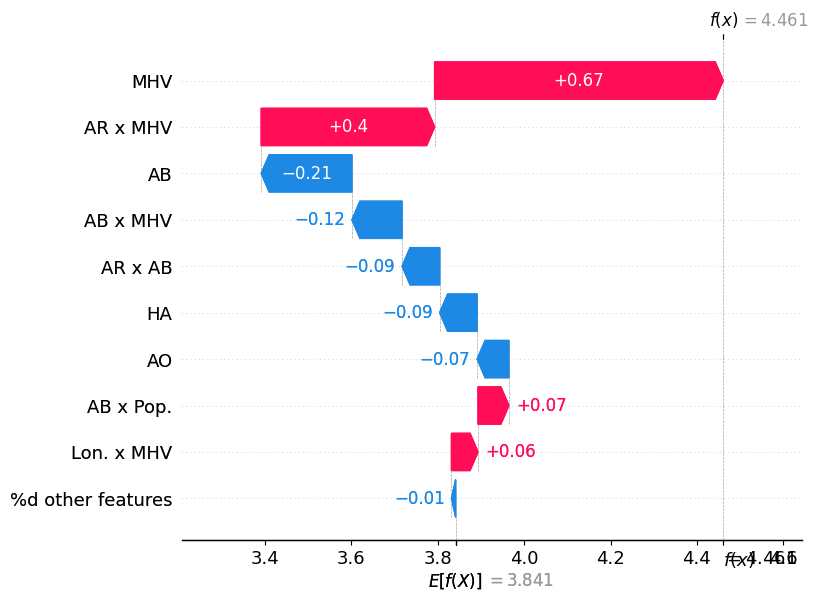

In [64]:
# waterfall plot

shapiq.plot.waterfall_plot(
    interaction_values = interaction_values,
    max_display=10,
    feature_names=feature_name,
    show=True
)

(<Figure size 600x600 with 1 Axes>, <Axes: >)

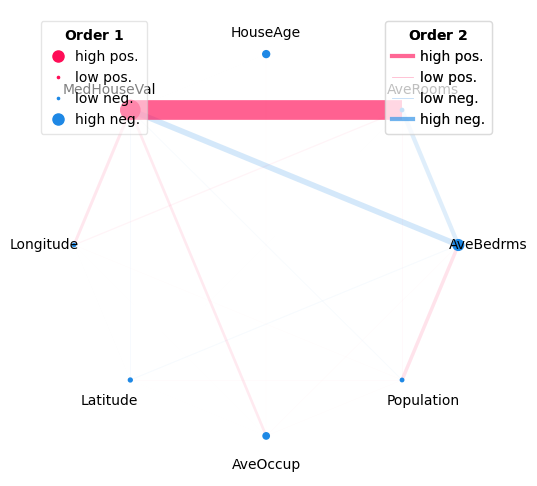

In [50]:
# Network Plot 

shapiq.plot.network_plot(
    first_order_values=interaction_values.get_n_order_values(1),
    second_order_values=interaction_values.get_n_order_values(2),
    feature_names=X.columns,
)

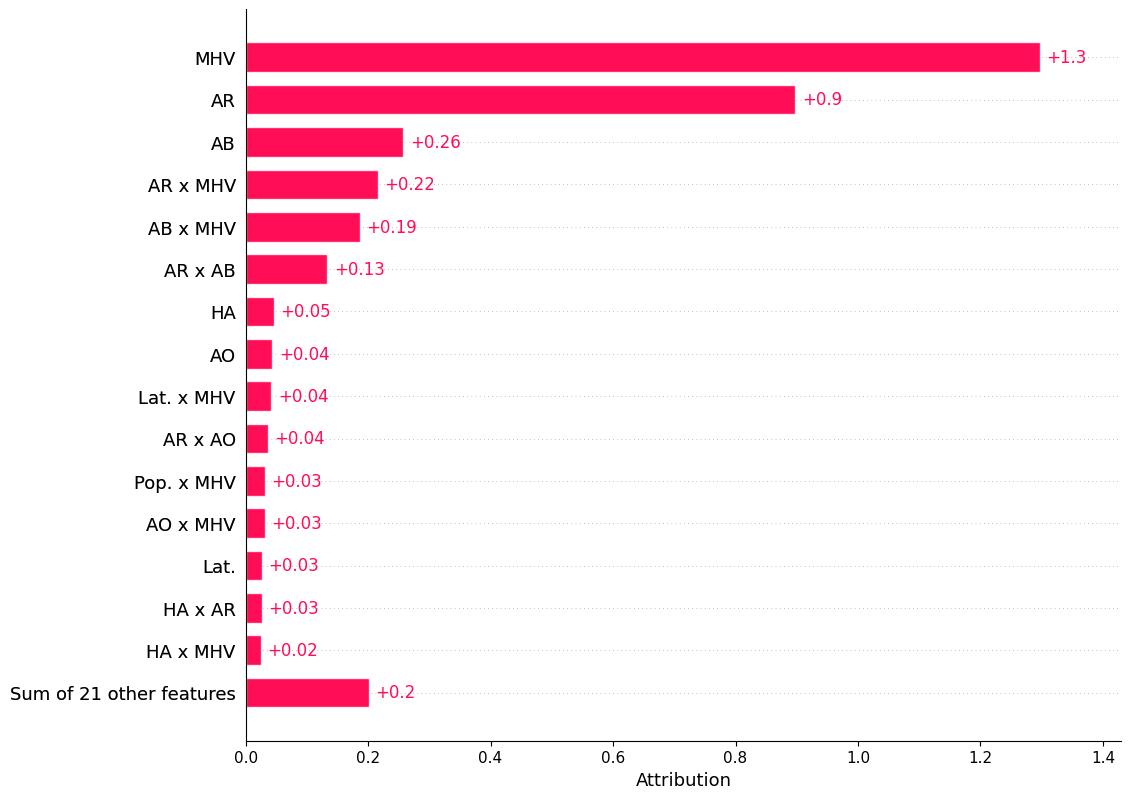

In [52]:
# Bar Plot over multiple instances

list_of_interaction_values = []
for i in range(5):
    list_of_interaction_values.append(explainer.explain(X_test_np[i]))
shapiq.plot.bar_plot(list_of_interaction_values, feature_names=X.columns, max_display=15,show=True)

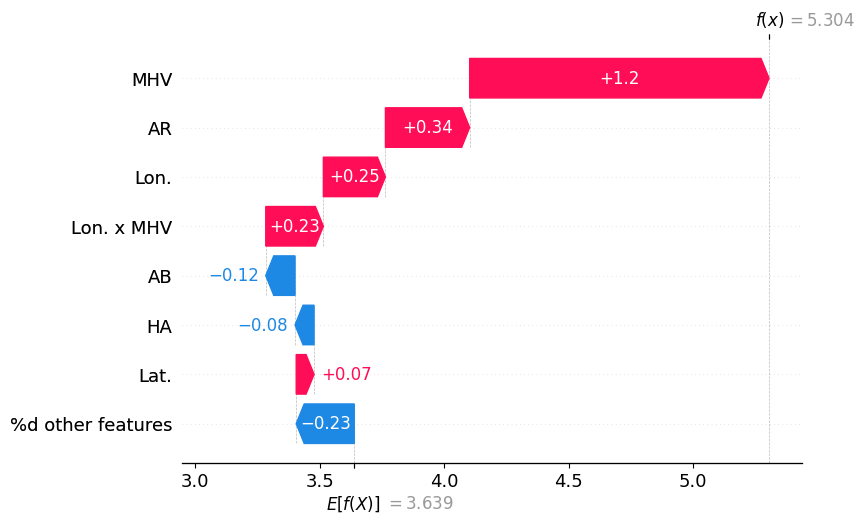

In [35]:
import shapiq
from shapiq.plot import bar_plot, force_plot, network_plot, si_graph, stacked_bar, upset_plot, waterfall_plot

# assuming best_models dict from tuning section, and X_train, X_test


# 1. Create explainer with interaction support up to 2nd order

# agnostic explainer (supports all models)





# instance = X_train_np[0]  # first instance for explanation

# interaction_values = explainer.explain(instance)

# # 2. Global interaction importance (bar plot)
# shapiq.plot.stacked_bar_plot(
#     interaction_values=interaction_values,
#     feature_names=X.columns,
#     max_order=2,
# )

# shapiq.plot.network_plot(
#     first_order_values=interaction_values.get_n_order_values(1),
#     second_order_values=interaction_values.get_n_order_values(2),
#     feature_names=X.columns,
# )

# 4. SI-graph: visual nodes & edges via game-theoretic view
#shapiq.plot.si_graph(interaction_values=interaction_values, feature_names=X.columns.tolist(), show=True)

# # 5. FORCES – local explanation for one instance (e.g., first test row)
# idx = 0
# iv_single = explainer.explain(X_test.iloc[[idx]])
# force_plot(iv_single, feature_names=X.columns.tolist(), show=True)
shapiq.plot.waterfall_plot(interaction_values, feature_names=X.columns.tolist(), max_display=8, show=True)

# # 6. Stacked bar for interaction breakdown
# stacked_bar(iv_single, feature_names=X.columns.tolist(), show=True)

# # 7. UpSet plot of top 20 interactions
# upset_plot(iv, feature_names=X.columns.tolist(), n_interactions=20, color_matrix=True, show=True)

# print(f"✅ Completed SHAPIQ visualizations for {name}")


AveRooms: 0.4728
MedHouseVal: 0.3342
AveBedrms: 0.0767
Population: 0.0289
AveOccup: 0.0262
HouseAge: 0.0255
Latitude: 0.0185
Longitude: 0.0172


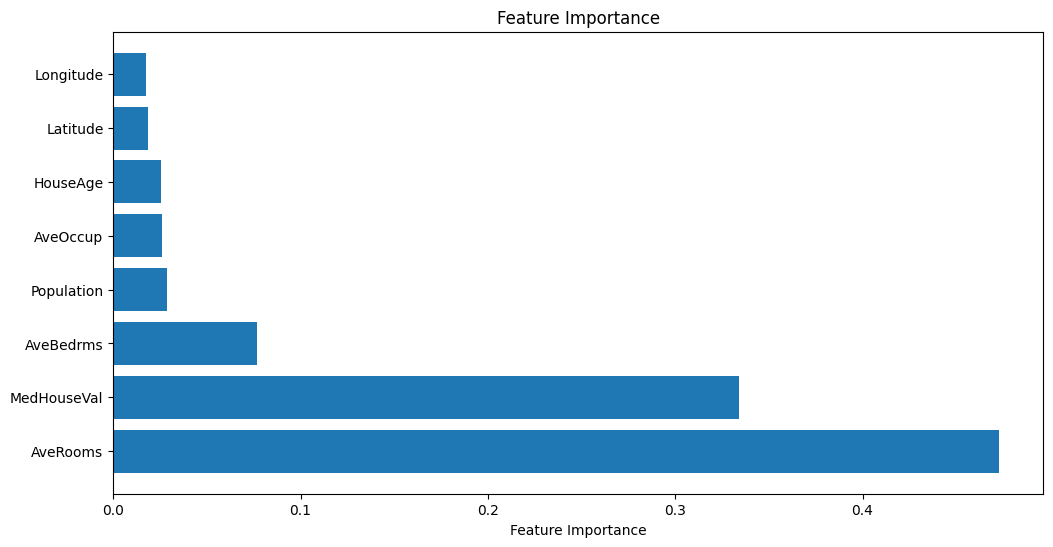

In [71]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#model = XGBRegressor(eval_metric='rmse')
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.show()
    